# Introduction

Speech is produced from a time varying vocal tract system with time varying excitation. As a result the speech signal is non-stationary in nature. Most of the signal processing tools studied in signals and systems and signal processing assume time invariant system  and time invariant excitation, i.e. stationary signal. Hence these tools are not directly applicable for speech processing. This is because, use of such tools directly on speech violates their underlying assumption.

 The tools can still assume the signal under processing to be stationary. Speech signal may be stationary when it is viewed in blocks  of 10-30 msec. Hence to process speech by different signal processing tools, it is viewed in terms of 10-30 msec. Such a processing is termed as Short Term Processing (STP).
 
Parameters like short term energy, short term zero crossing rate and short term autocorrelation can be computed from the time domain processing of speech. Alternatively, short term Fourier transform can be computed from the frequency domain processing of speech.

In [34]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
audio_path = 'harvard.wav'
signal, sr = librosa.load(audio_path, sr=None)  # Load audio and sampling rate


In [3]:
signal

array([ 0.0000000e+00,  1.5258789e-05, -3.0517578e-05, ...,
       -1.7395020e-03, -1.7547607e-03, -1.8463135e-03], dtype=float32)

In [4]:
signal.shape

(809508,)

In [5]:
sr

44100

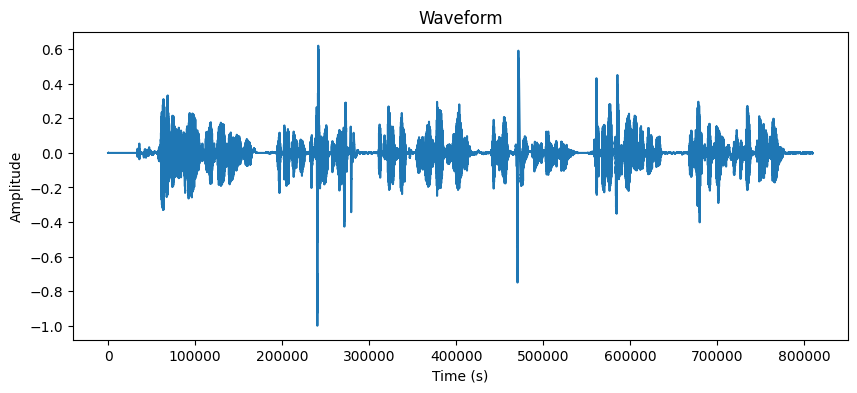

In [6]:
plt.figure(figsize=(10, 4))
# librosa.display.waveshow(signal)
plt.plot(signal)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [7]:
#number of samples in 20ms
sample20ms = int(sr * 0.02)

samples_20 = signal[:sample20ms]

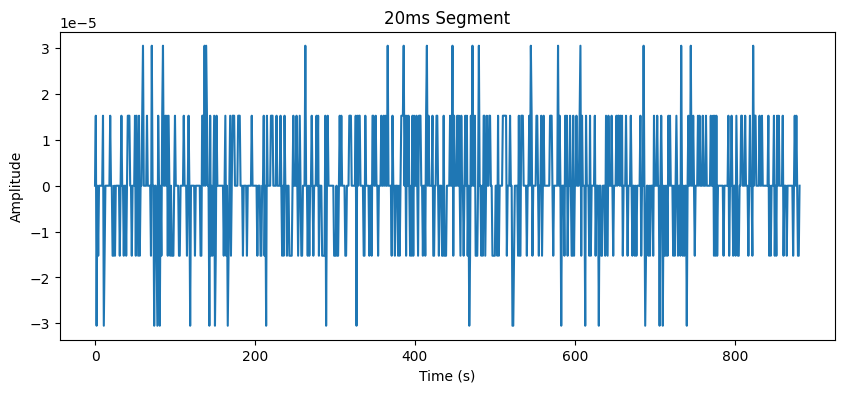

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(samples_20)
plt.title('20ms Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


# Short Term Energy
The energy associated with speech is time varying in nature. Hence the interest for any automatic processing of speech is to know how the energy is varying with time and to be more specific, energy associated with short term region of speech. By the nature of production, the speech signal consist of voiced, unvoiced and silence regions. Further the energy associated with voiced region is large compared to unvoiced region and silence region will not have least or  negligible energy. Thus short term energy can be used for voiced, unvoiced and silence classification of speech.

In [9]:
def short_term_energy(segment):
    return sum(segment ** 2)

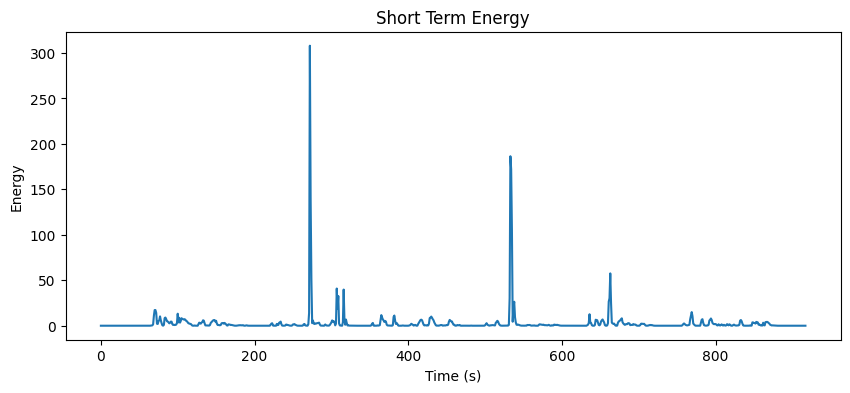

In [10]:
ste = []

for i in range(0, len(signal), sample20ms):
    ste.append(short_term_energy(signal[i:i+sample20ms]))
    
plt.figure(figsize=(10, 4))
plt.plot(ste)
plt.title('Short Term Energy')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.show()

# Zero Crossing Rate
The Zero-Crossing Rate (ZCR) aims to study the the rate in which a signal's amplitude changes sign within each frame. Compared to the previous two features, this one is quite simple to extract.

Zero Crossing Rate gives information about the number of zero-crossings present in a given signal. Intuitively, if the number of zero crossings are more in a given signal, then the signal is changing rapidly and accordingly the signal may contain  high frequency information.  On the similar lines, if the number of zero crossing are less, hence the signal is changing slowly and accordingly the signal may contain low frequency information. Thus ZCR gives an indirect information about the frequency content of the signal.

In [11]:
def sign(n):
    if n >= 0:
        return 1
    else:
        return -1

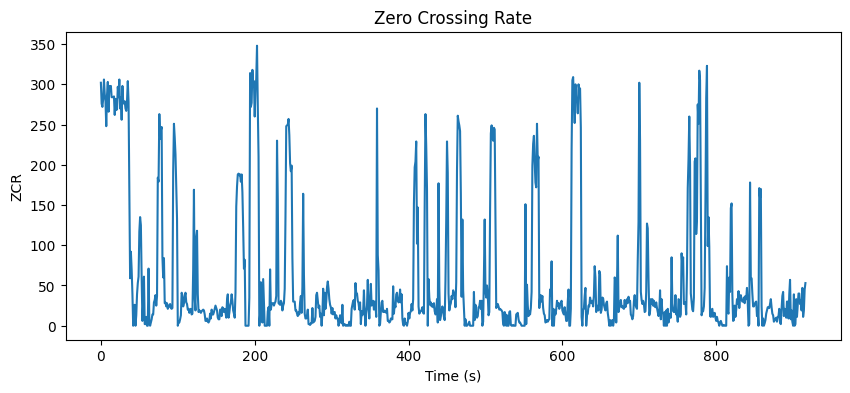

In [12]:
zcr = []

for i in range(0, len(signal)-sample20ms, sample20ms):
    zc = 0
    for j in range(1, sample20ms):
        zc += abs(sign(signal[i+j]) - sign(signal[i+j-1])) / 2
    zcr.append(zc)
    
plt.figure(figsize=(10, 4))
plt.plot(zcr)
plt.title('Zero Crossing Rate')
plt.xlabel('Time (s)')
plt.ylabel('ZCR');

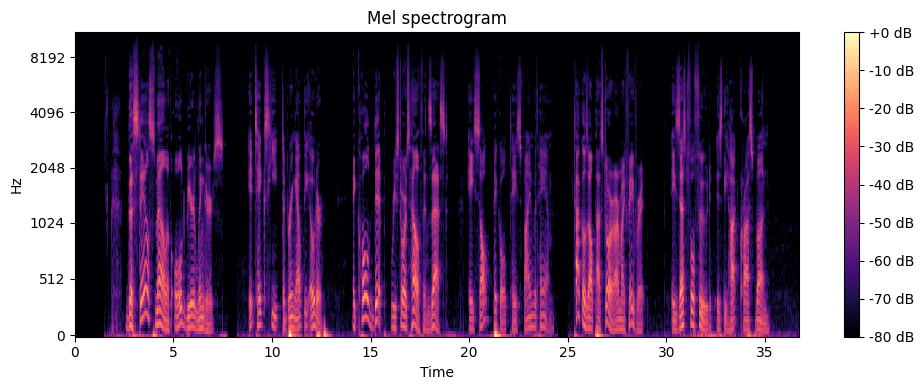

In [15]:
spec = librosa.feature.melspectrogram(y = signal, sr=sr, n_mels=128)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spec, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()


Text(0.5, 0, 'Time (s)')

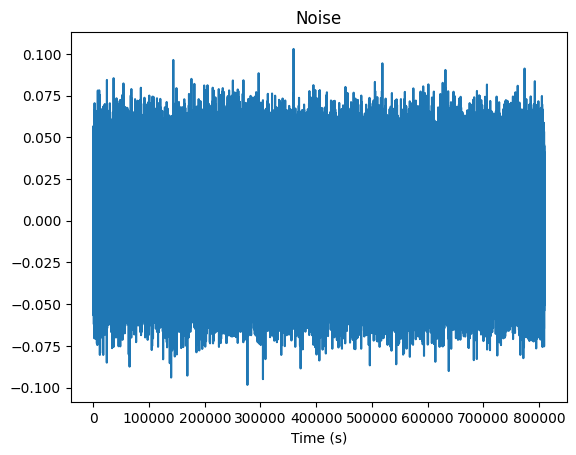

In [19]:
noise = np.random.normal(0, 0.02, signal.shape)

plt.plot(noise)
plt.title('Noise')
plt.xlabel('Time (s)')

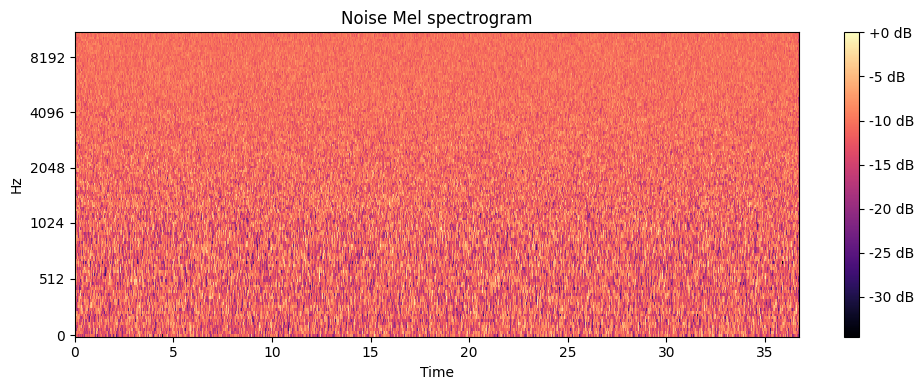

In [20]:
noise_spec = librosa.feature.melspectrogram(y = noise, sr=sr, n_mels=128)   

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(noise_spec, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Noise Mel spectrogram')
plt.tight_layout()


# Fourier Transform

In [21]:
def fft_components(sound):
    fft = np.fft.fft(sound)
    
    mag = np.abs(np.real(fft))
    
    freq = np.linspace(0, sr, len(mag))
    return mag, freq

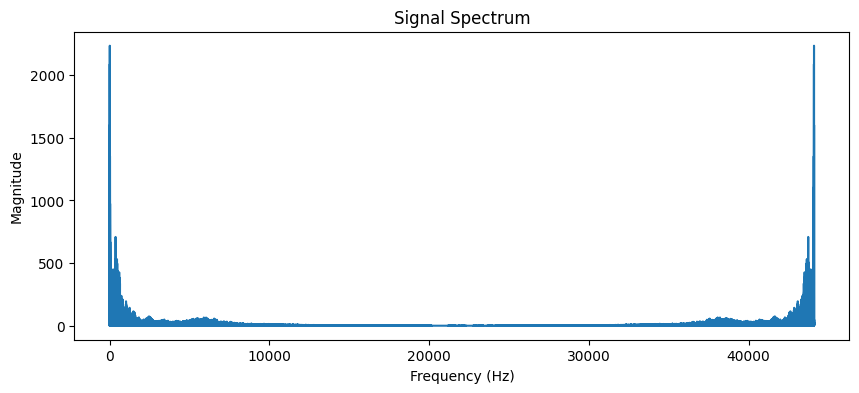

In [22]:
sig_mag, sig_freq = fft_components(signal)

plt.figure(figsize=(10, 4))
plt.plot(sig_freq, sig_mag)
plt.title('Signal Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude');

Peaks in the spectrum -> dominating frequencies\
height of peaks -> strength of freq components

# Spectrogram

In [24]:
def to_decibels(signal):
    
    # perform short term fourier transform and take absolute values
    stft = np.abs(librosa.stft(signal))
    
    # convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max)
    
    #return converted audio signal
    return D

def plot_spec(D, sr):
    fig, ax = plt.subplots(figsize = (30,10))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Spectrogram')
    fig.colorbar(spec)

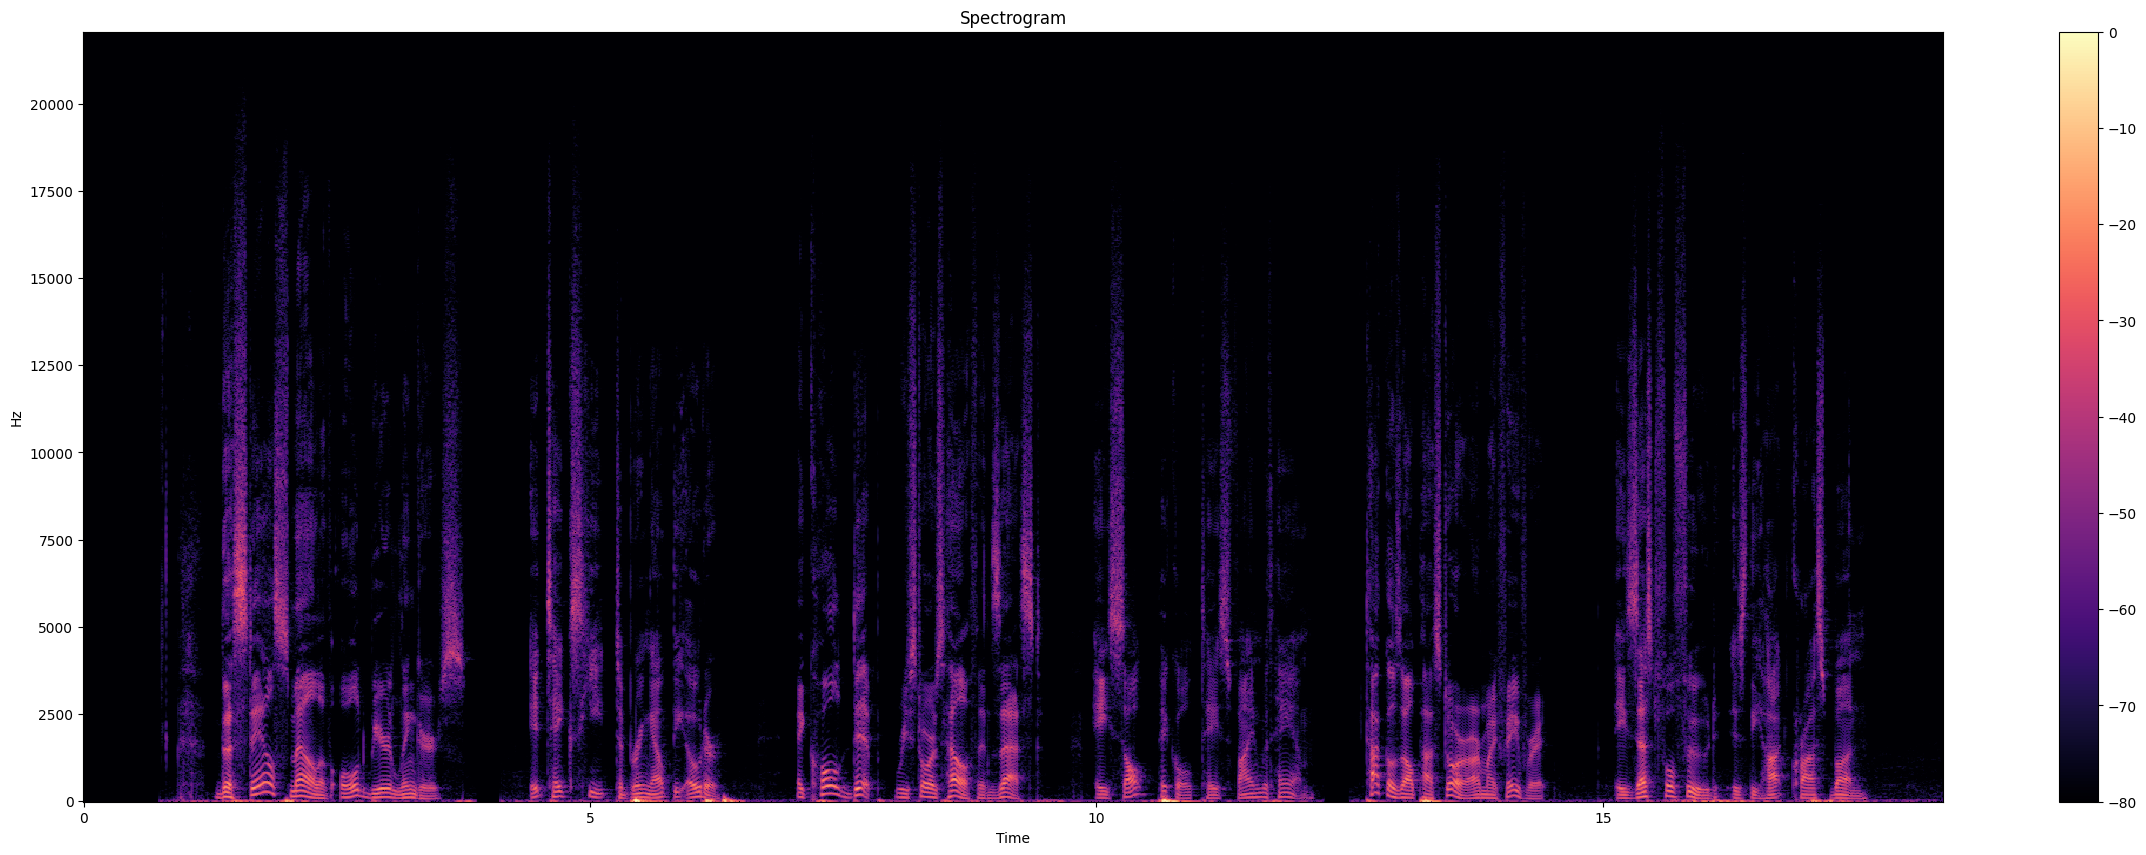

In [26]:
plot_spec(to_decibels(signal), sr)

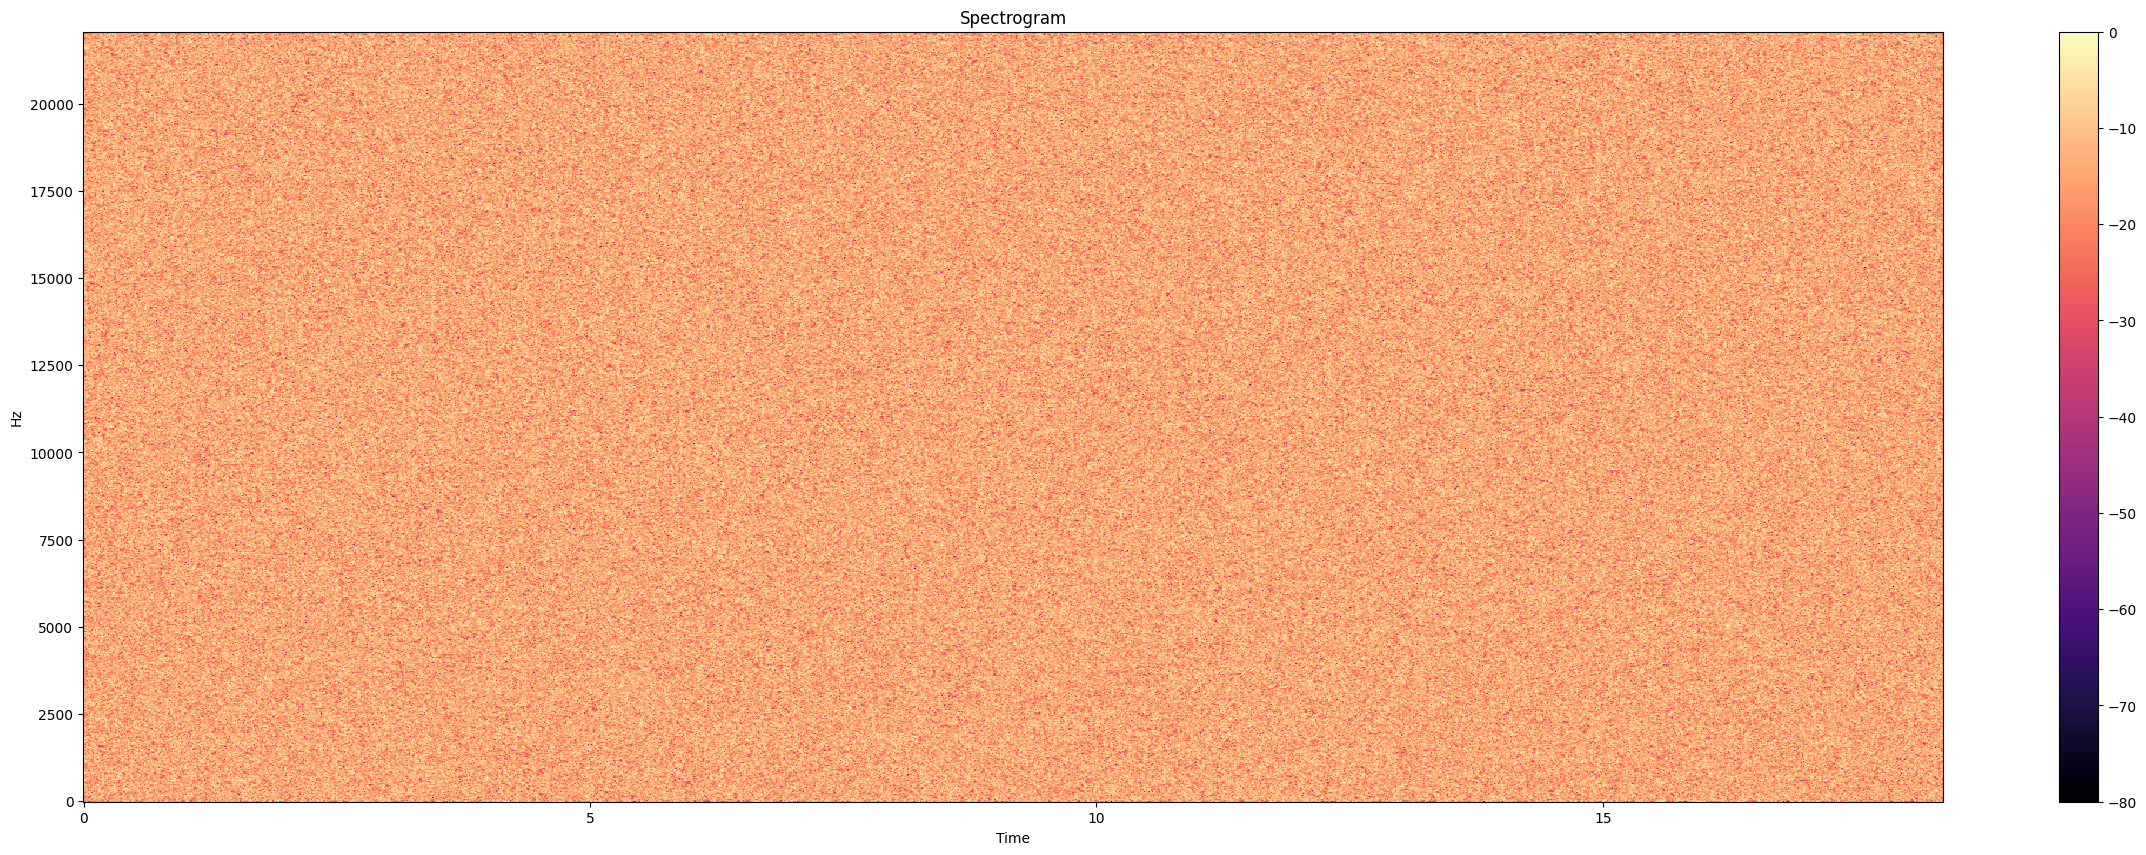

In [28]:
plot_spec(to_decibels(noise), sr)

# Wideband and Narrowband spectrogram

In [31]:
# Wideband spectrogram
wideband_spec = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=512)

# Narrowband spectrogram
narrowband_spec = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=256)


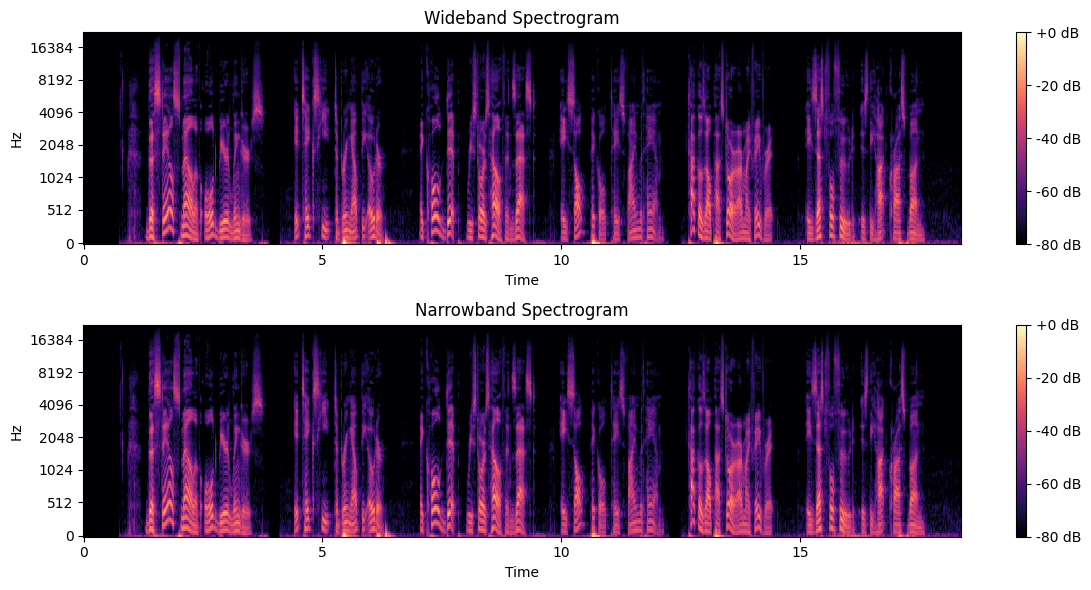

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(wideband_spec, ref=np.max), sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Wideband Spectrogram')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(narrowband_spec, ref=np.max), sr=sr, hop_length=256, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Narrowband Spectrogram')

plt.tight_layout()
plt.show()


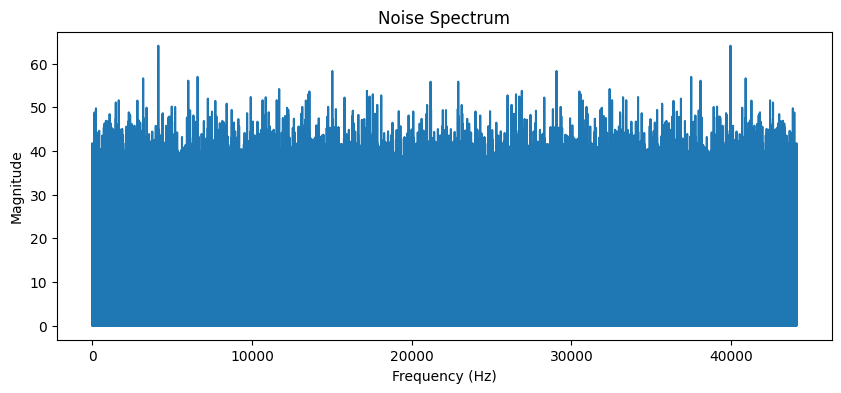

In [23]:
noise_mag, noise_freq = fft_components(noise)

plt.figure(figsize=(10, 4))
plt.plot(noise_freq, noise_mag)
plt.title('Noise Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude');

If spectrum has lot of high frequency components, this indicates presence of noise

# Mel Scale

scale that represents the perceived pitch of sounds by humans

In [33]:
# Create function to convert Hz to Mels
def freqToMel(f):
    return 1127 * math.log(1 + (f/700))


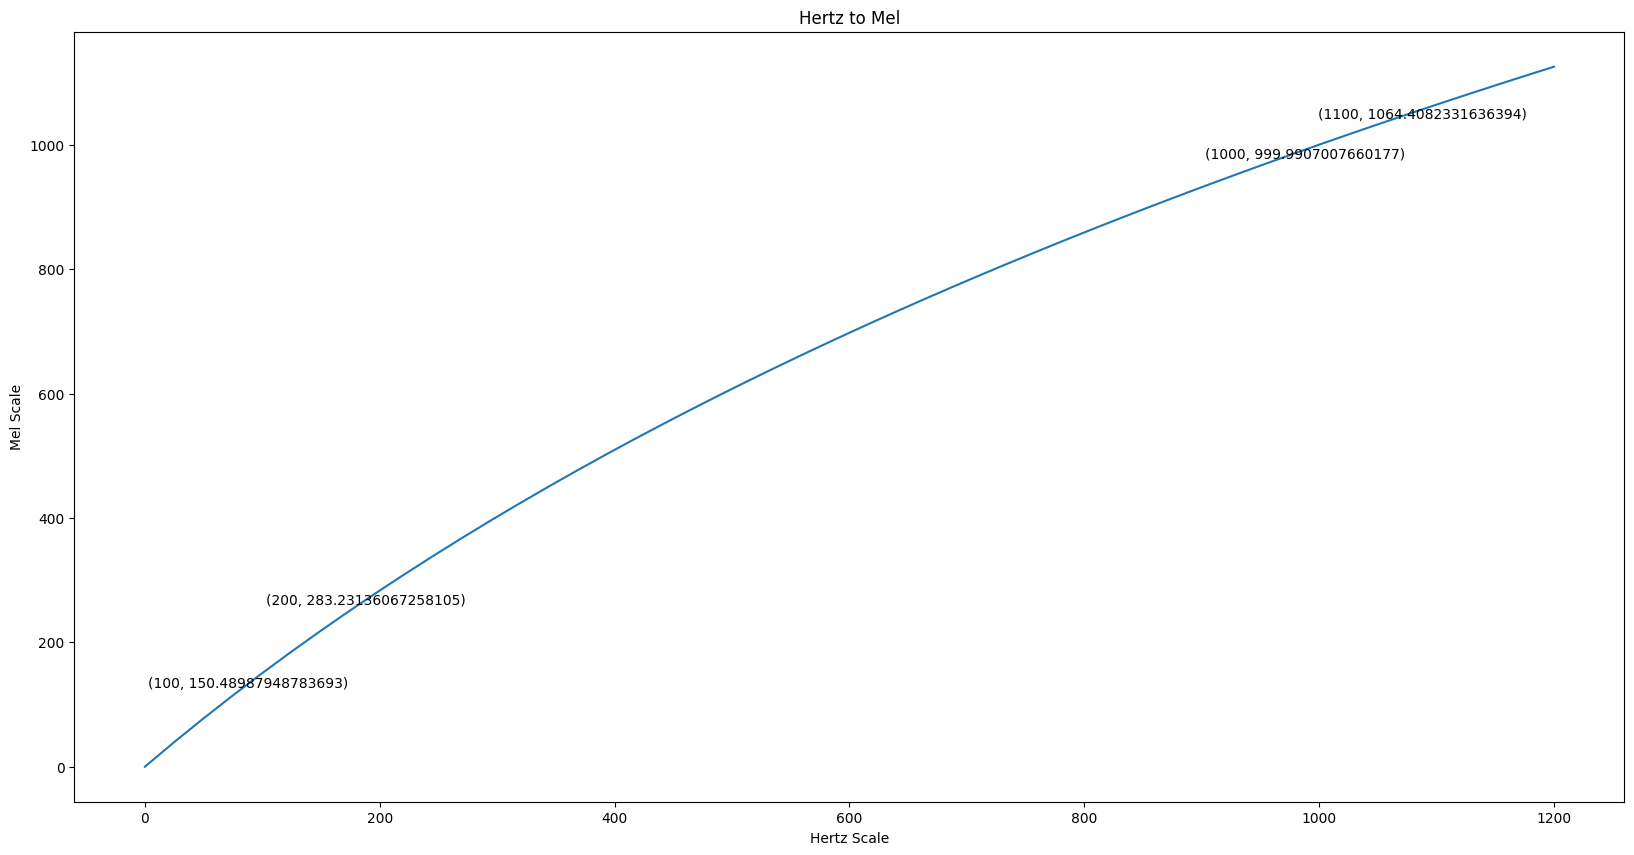

In [40]:
freqToMelv = np.vectorize(freqToMel)

Hz = np.linspace(0,1200) 
# Now we just apply the vectorized function to the Hz variable
Mel = freqToMelv(Hz) 

x_point = 100
y_point = freqToMel(x_point)

x_point1 = 200
y_point1 = freqToMel(x_point1)

x_point2 = 1000
y_point2 = freqToMel(x_point2)

x_point3 = 1100
y_point3 = freqToMel(x_point3)

# Plotting the figure:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(Hz, Mel)
ax.annotate(f'({x_point}, {y_point})', (x_point, y_point), textcoords="offset points", xytext=(-10,-10), ha='center')
ax.annotate(f'({x_point1}, {y_point1})', (x_point1, y_point1), textcoords="offset points", xytext=(-10,-10), ha='center')
ax.annotate(f'({x_point2}, {y_point2})', (x_point2, y_point2), textcoords="offset points", xytext=(-10,-10), ha='center')
ax.annotate(f'({x_point3}, {y_point3})', (x_point3, y_point3), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.title('Hertz to Mel')
plt.xlabel('Hertz Scale')
plt.ylabel('Mel Scale')
plt.show()

# Mel Frequency Cepstral Coefficients
The basic procedure to develop MFCCs is the following:

- Convert from Hertz to Mel Scale
- Take logarithm of Mel representation of audio
- Take logarithmic magnitude and use Discrete Cosine Transformation (DCT)
- This result creates a spectrum over Mel frequencies as opposed to time, thus creating MFCCs

MFCC is the widely used technique for extracting the features from the audio signal.\
MFCCs are a set of coefficients that
capture the shape of the power spectrum of a sound
signal. They are derived by first transforming the raw
audio signal into a frequency domain using a technique
like the Discrete Fourier Transform (DFT), and then
applying the mel-scale to approximate the human auditory
perception of sound frequency. Finally, cepstral
coefficients are computed from the mel-scaled spectrum.

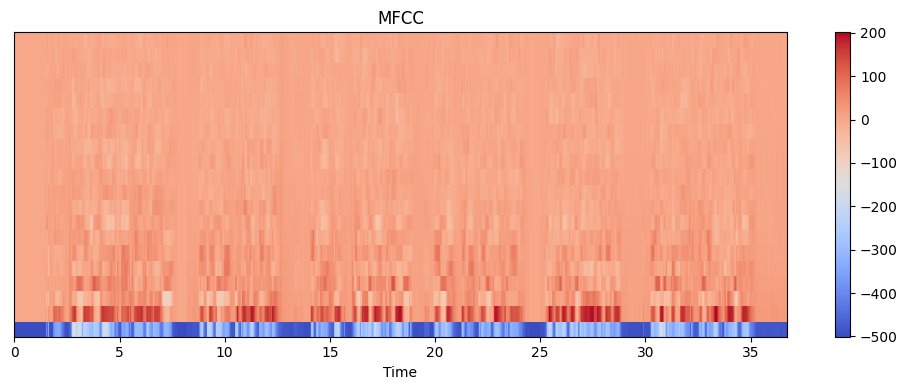

In [42]:
MFCC = librosa.feature.mfcc(y = signal)

plt.figure(figsize=(10, 4))
librosa.display.specshow(MFCC, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()


# Autocorrelation

Crosscorrelation tool from signal processing can be used for finding the similarity among the two sequences and refers to the case of having two different sequences for correlation. Autocorrelation refers to the case of having only one sequence for correlation. In autocorrelation, the interest is in observing how similar the signal characteristics with respect to time. This is achived by providing different time lag for the sequence and computing with the given sequence as reference.

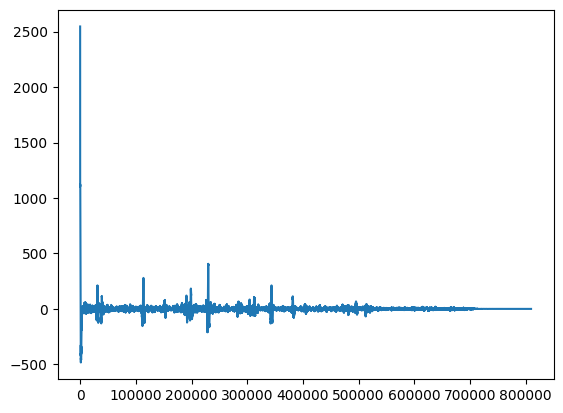

In [43]:
autocorrelation = np.correlate(signal, signal, mode='full')

# The result is symmetric, so we slice off the redundant half
autocorrelation = autocorrelation[len(autocorrelation)//2:]

plt.plot(autocorrelation)
plt.show()

## Finding Pitch Frequency

1. Compute the autocorrelation of the signal.
2. Find the lag at which the autocorrelation achieves its first peak after the zero-lag peak. This lag corresponds to the period of the fundamental frequency.
3. The pitch frequency can then be estimated as the reciprocal of the period (in seconds).


In [44]:
# Assuming `signal` is your data
autocorrelation = np.correlate(signal, signal, mode='full')

# The result is symmetric, so we slice off the redundant half
autocorrelation = autocorrelation[len(autocorrelation)//2:]

# Find the lag of the maximum autocorrelation peak after the zero-lag peak
# We ignore the zero-lag peak by starting the search from index 1
pitch_lag = np.argmax(autocorrelation[1:]) + 1

# Estimate the pitch frequency
# Assuming `sr` is the sampling rate of your signal
pitch_frequency = sr / pitch_lag

print(f'Pitch frequency: {pitch_frequency} Hz')

Pitch frequency: 44100.0 Hz


In [48]:
print(f'Pitch Period: {1000/pitch_frequency} ms')

Pitch Period: 0.022675736961451247 ms


# Spectrum Estimation

In [49]:
fft = np.fft.fft(signal)

# Get the absolute value of the FFT, which is the magnitude spectrum
spectrum = np.abs(fft)

# Normalize by the number of data points to get the true amplitude
spectrum = spectrum / len(signal)

# Since the spectrum is symmetric, we only need to consider the first half
spectrum = spectrum[:len(spectrum)//2]

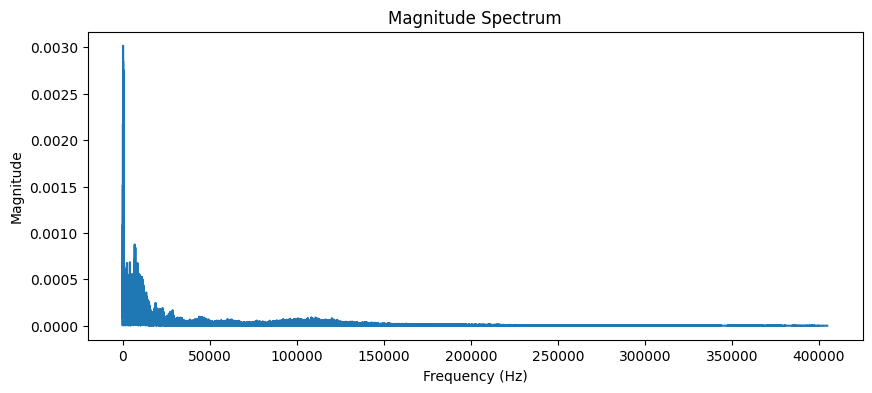

In [50]:
plt.figure(figsize=(10, 4))
plt.plot(spectrum)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude');

In [51]:
# Find the index of the maximum value in the spectrum
max_idx = np.argmax(spectrum)

# Find the indices where the spectrum decreases to half its maximum value
half_max_idx = np.where(spectrum <= spectrum[max_idx]/2)[0]

# The mainlobe width is the difference between the last index before the maximum and the first index after the maximum
mainlobe_width = half_max_idx[half_max_idx > max_idx][0] - half_max_idx[half_max_idx < max_idx][-1]

print(f'Mainlobe width: {mainlobe_width} Hz')

Mainlobe width: 4 Hz
